<a href="https://colab.research.google.com/github/leeseunghwan0409/AIFFEL_Online_Quest/blob/main/Part2_Node10/10_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 머신러닝 프로젝트 - Airbnb 리스트로 가격을 예측하기!

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Airbnb (NewYork City) 리스트로 가격을 예측해본다!

### 1. Baseline
- 라이브러리와 데이터 불러오기

In [2]:
# 라이브러리
import pandas as pd

In [3]:
# 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')

### 2. EDA (탐색적 데이터 분석)
- 탐색적으로 데이터 살펴보기

In [4]:
# 데이터 크기 확인
train.shape, test.shape

((39116, 16), (9779, 15))

In [5]:
# 데이터 샘플 확인
display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


In [6]:
# 데이터 타입 확인 (train)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [7]:
# 데이터 타입 확인 (test)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9779 entries, 0 to 9778
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              9779 non-null   int64  
 1   name                            9775 non-null   object 
 2   host_id                         9779 non-null   int64  
 3   host_name                       9775 non-null   object 
 4   neighbourhood_group             9779 non-null   object 
 5   neighbourhood                   9779 non-null   object 
 6   latitude                        9779 non-null   float64
 7   longitude                       9779 non-null   float64
 8   room_type                       9779 non-null   object 
 9   minimum_nights                  9779 non-null   int64  
 10  number_of_reviews               9779 non-null   int64  
 11  last_review                     7721 non-null   object 
 12  reviews_per_month               77

In [8]:
# 결측치 (train)
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [9]:
# 결측치 (test)
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<Axes: >

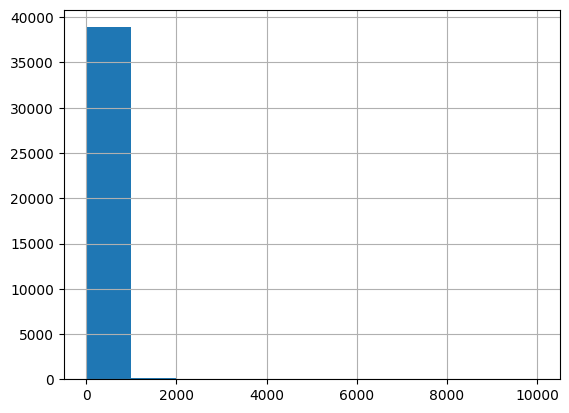

In [10]:
# target(hist) ['price'] 시각화하여 확인
train['price'].hist()

In [11]:
# target(descibe) ['price'] 기초통계 확인
train['price'].describe()

count    39116.000000
mean       152.751150
std        241.752501
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [12]:
# 피처(value_counts) ['host_id'] 항목별 개수 확인
train['host_id'].value_counts()

219517861    256
107434423    181
30283594      99
137358866     82
12243051      80
            ... 
73369106       1
26620387       1
176660539      1
26004891       1
2609535        1
Name: host_id, Length: 30845, dtype: int64

### 3. 데이터 전처리
- 데이터를 살펴보고 판단하여 결측치 및 이상치를 처리

In [13]:
# 결측치 칼럼 삭제 (last_review) (train, test)
train = train.drop(['last_review'], axis=1)
test = test.drop(['last_review'], axis=1)

In [14]:
# 삭제된 결측치가 삭제되었는지 확인
display(train.head(5))
display(test.head(5))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,1.68,2,262
2,26871281,West Village Apartment,440022,Petter,Manhattan,West Village,40.73001,-74.00562,Entire home/apt,150,60,1,0.20,1,0
3,698132,"LARGE PRIVATE FLOOR IN BROOKLYN, NY",3577509,Eric,Brooklyn,Bedford-Stuyvesant,40.69128,-73.93653,Entire home/apt,85,4,239,2.89,2,1
4,15783953,"Sun-drenched apartment, 20 mins to Manhattan",12475280,George,Brooklyn,Bedford-Stuyvesant,40.68899,-73.95555,Private room,44,28,0,NaN,1,0


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2.09,1,244
2,414801,Industrial Brooklyn Loft with Tree-Lined Windows,319077,Shell,Brooklyn,Clinton Hill,40.68722,-73.96289,Entire home/apt,1,54,0.65,4,365
3,21815842,Spacious 2 bedroom in beautiful Clinton Hill,1931990,Yarden,Brooklyn,Clinton Hill,40.68859,-73.96035,Entire home/apt,3,2,0.13,1,0
4,13576581,Modern Central Park Apartment close to everything,78325795,Bozhena,Manhattan,Harlem,40.80573,-73.94994,Entire home/apt,1,160,4.31,3,246


In [15]:
# 결측치 재확인 (train)
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [16]:
# 결측치 재확인 (test)
test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [17]:
# 결측치 채우기 (train, test)
train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
test['reviews_per_month'] = test['reviews_per_month'].fillna(0)

In [18]:
# 결측치가 제대로 채워 졌는지 확인 (train)
train.isnull().sum()

id                                 0
name                              12
host_id                            0
host_name                         17
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [19]:
# 결측치가 제대로 채워 졌는지 확인 (train)
test.isnull().sum()

id                                0
name                              4
host_id                           0
host_name                         4
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [20]:
# 가격 값 복사 (train 데이터와 test 데이터 컬럼수를 맞추기 위함)
target = train['price']
train = train.drop(['price'], axis=1)

In [21]:
# train데이터에서 ['price'] 값 삭제되었는지 확인
train.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,3,3,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,2,64,1.68,2,262
2,26871281,West Village Apartment,440022,Petter,Manhattan,West Village,40.73001,-74.00562,Entire home/apt,60,1,0.20,1,0


In [22]:
# 수치형 피처 복사
# 수치형, 범주형 데이터로 분리

nums_train = train.select_dtypes(exclude='object').copy()
cha_train = train.select_dtypes(include='object').copy()
nums_test = test.select_dtypes(exclude='object').copy()
cha_test = test.select_dtypes(include='object').copy()

In [23]:
# 데이터가 잘 나누어 졌는지 확인 (기초통계) - 수치형 train
nums_train.describe()

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.911600e+04,3.911600e+04,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000
mean,1.898464e+07,6.774143e+07,40.728848,-73.952125,6.990720,23.272855,1.091963,7.090756,112.980826
std,1.099302e+07,7.881383e+07,0.054499,0.046354,20.310323,44.589170,1.600772,32.661136,131.674306
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.412608e+06,7.834978e+06,40.690038,-73.983190,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.963650e+07,3.070949e+07,40.723000,-73.955740,2.000000,5.000000,0.370000,1.000000,45.000000
75%,2.913445e+07,1.074344e+08,40.762943,-73.936338,5.000000,23.000000,1.590000,2.000000,228.000000
max,3.648561e+07,2.743213e+08,40.912340,-73.712990,1250.000000,629.000000,58.500000,327.000000,365.000000


In [24]:
# 데이터가 잘 나누어 졌는지 확인 (기초통계) - 범주형 train
cha_train.describe()

,name,host_name,neighbourhood_group,neighbourhood,room_type
count,39104,39099,39116,39116,39116
unique,38420,9977,5,221,3
top,Home away from home,Michael,Manhattan,Williamsburg,Entire home/apt
freq,15,338,17331,3099,20299


In [25]:
# 수치형 변수를 표준화작업
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = [
    'host_id',
    'latitude',
    'longitude',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]

nums_train[cols] = scaler.fit_transform(train[cols])
nums_test[cols] = scaler.fit_transform(test[cols])

In [26]:
# 표준화 작업 후 확인
display(nums_train.head(2))
display(nums_test.head(2))

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,0.335962,1.336232,-0.122644,-0.196490,-0.454665,-0.625932,-0.155868,-0.858043
1,9458704,-0.237602,0.578404,-0.820543,-0.245726,0.913398,0.367351,-0.155868,1.131740


,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,-0.428876,-0.361573,0.128485,-0.196644,-0.479344,-0.490575,-0.186461,-0.852161
1,971247,-0.794749,1.177009,-0.276067,-0.196644,3.057019,0.633701,-0.186461,1.004609


In [27]:
# id 컬럼 삭제
nums_train = nums_train.drop(['id'], axis=1)
nums_test = nums_test.drop(['id'], axis=1)

In [28]:
# id 컬럼 삭제 되었는지 확인
display(nums_train.head(2))
display(nums_test.head(2))

,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0.335962,1.336232,-0.122644,-0.196490,-0.454665,-0.625932,-0.155868,-0.858043
1,-0.237602,0.578404,-0.820543,-0.245726,0.913398,0.367351,-0.155868,1.131740


,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,-0.428876,-0.361573,0.128485,-0.196644,-0.479344,-0.490575,-0.186461,-0.852161
1,-0.794749,1.177009,-0.276067,-0.196644,3.057019,0.633701,-0.186461,1.004609


In [29]:
# 범주형 데이터 확인
cha_train.describe()

,name,host_name,neighbourhood_group,neighbourhood,room_type
count,39104,39099,39116,39116,39116
unique,38420,9977,5,221,3
top,Home away from home,Michael,Manhattan,Williamsburg,Entire home/apt
freq,15,338,17331,3099,20299


In [30]:
# 범주형 변수
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = [
    'neighbourhood_group',
    'neighbourhood',
    'room_type'
]
for col in cols:
    cha_train[col] = le.fit_transform(cha_train[col])
    cha_test[col] = le.transform(cha_test[col])

In [31]:
# 범주형 데이터 확인 (cha_train, cha_test)
display(cha_train.head(2))
display(cha_test.head(2))

,name,host_name,neighbourhood_group,neighbourhood,room_type
0,Room in South Harlem near Central Park,Gilles,2,94,1
1,"Large 1BR Apartment, near Times Sq (2nd Floor)",Iradj,2,95,0


,name,host_name,neighbourhood_group,neighbourhood,room_type
0,"Cozy and Sunny Room Williamsburg, Luxury Building",Rémy,1,214,1
1,Sunny Artist Live/Work Apartment,Larry,2,202,0


In [32]:
# 결측값이 있는 name, host_name은 삭제
del_cols = ['name', 'host_name']
cha_train = cha_train.drop(del_cols, axis=1)
cha_test = cha_test.drop(del_cols, axis=1)

In [33]:
# 결측값 삭제 후 확인
display(cha_train.head(2))
display(cha_test.head(2))

,neighbourhood_group,neighbourhood,room_type
0,2,94,1
1,2,95,0


,neighbourhood_group,neighbourhood,room_type
0,1,214,1
1,2,202,0


In [34]:
# 분리한 수치형, 범주형 데이터 합하기
train = pd.concat([nums_train, cha_train], axis=1)
test = pd.concat([nums_test, cha_test], axis=1)
print(train.shape, test.shape)
display(train.head(2))
display(test.head(2))

(39116, 11) (9779, 11)


,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type
0,0.335962,1.336232,-0.122644,-0.196490,-0.454665,-0.625932,-0.155868,-0.858043,2,94,1
1,-0.237602,0.578404,-0.820543,-0.245726,0.913398,0.367351,-0.155868,1.131740,2,95,0


,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type
0,-0.428876,-0.361573,0.128485,-0.196644,-0.479344,-0.490575,-0.186461,-0.852161,1,214,1
1,-0.794749,1.177009,-0.276067,-0.196644,3.057019,0.633701,-0.186461,1.004609,2,202,0


### 4. 검증 데이터 분리
- Train 데이터로 학습(훈련), Validation(검증용)데이터로 예측


In [35]:
# 검증 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=2021)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31292, 11), (7824, 11), (31292,), (7824,))

### 5. 머신러닝

In [36]:
# 머신러닝(회귀)
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

37267.59316820133

In [37]:
# 릿지 회귀
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.01)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

37267.59304763857

In [38]:
# 라쏘 회귀
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.01)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

37267.59909621119

In [39]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=0.01)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

37266.6642572881

In [40]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

39152.38778298824

In [41]:
# Xgboost
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

36025.669093521334

In [42]:
# 최적의 하이퍼파라미터 찾기
# 라이브러리 불러오기
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

params={'learning_rate':[0.07, 0.05, 0.03],
       'max_depth':[3, 5, 7],
       'n_estimators':[100, 200, 300],
       'subsample':[0.9, 0.8, 0.7, 0.6]
       }

# GridSearchCV
xgb = XGBRegressor()
grid = GridSearchCV(xgb, params, cv=3, n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.07, 0.05, 0.03],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.9, 0.8, 0.7, 0.6]})

In [43]:
# 최적의 하이퍼파라미터 찾기
grid.best_params_

{'learning_rate': 0.03, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.6}

In [45]:
# XGBoost 하이퍼파라미터 적용 후 결과 값
xgb = XGBRegressor(
    learning_rate = 0.03,
    max_depth = 7,
    n_estimators = 100,
    subsample = 0.6
)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_val)
mean_squared_error(y_val, pred)

36643.70766080274

### 6. 채점

In [46]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/y_test.csv')

# Xgboost
pred = model.predict(test)
mean_squared_error(y_test, pred)

47517.585782079164

---
- 회고
  - 머신러닝 챕터를 마무리하며 어느정도 자신감은 붙은거 같다.
    하지만 아직 사용하는데 있어서는 부족한 감이 들어서 꾸준히 연습을 해야만 할 것 같다.

- KPT
  - K   
      1. 머신러닝 챕터를 배우면서 배웠던 코드를 사용하여 작성하였다.
  - P   
      1. 작성 후 풀이 동영상을 보며 아직 부족한 부분들이 많다는 걸 느꼈다.
  - T   
      1. 다양한 코드 문제들을 풀어보며 연습을 해야겠다.  